In [1]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    # carpeta donde se encuentran archivos .py auxiliares
    FUENTES_DIR = '/content/drive/MyDrive/Colab Notebooks/FUENTES/'
    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/DATOS/'      # carpeta donde se encuentran los datasets
else:
    # configuración para notebook con instalación LOCAL
    FUENTES_DIR = '../Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR   = '../Datos/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import preprocessing

import time
#from matplotlib import pyplot as plt
from matplotlib import pylab as plt
from IPython import display
# Ajustar el tamaño predeterminado de las figuras
plt.rcParams['figure.figsize'] = [4,3] 

#from grafica import *
from ClassNeuronaLineal import NeuronaLineal

In [3]:
# Leer HOUSING.csv
df = pd.read_csv(DATOS_DIR + "housing.csv")
#nColum = list(datos.columns.values)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
df = df.dropna()
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

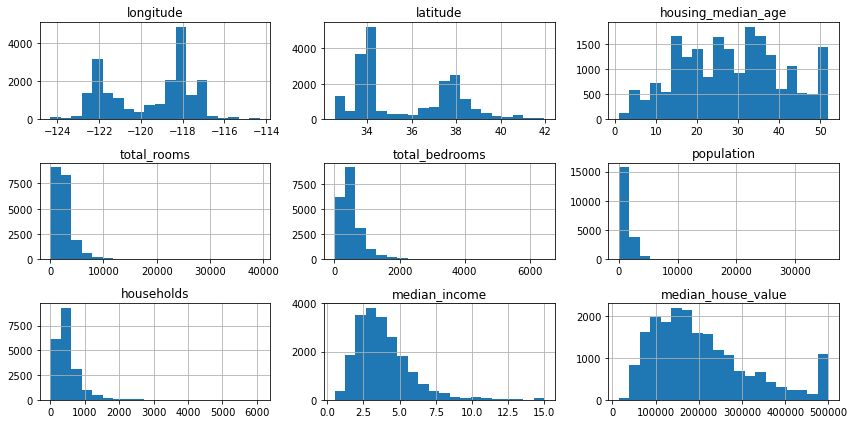

In [6]:
#import pandas as pd
#import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 6))  # Ajusta nrows y ncols según tus necesidades
df.hist(ax=axes, bins=20)

plt.tight_layout()  # Ajusta el espaciado entre subplots
plt.show()


In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
Ejemplos = np.array(df.iloc[:, :-1])

normalizarEntrada = 1

if normalizarEntrada:
    normalizador = preprocessing.MinMaxScaler()
    Ejemplos = normalizador.fit_transform(Ejemplos)

In [9]:
nomCol = np.array(df.iloc[:, :-1].columns.values)

attPred = 8 #-- nro de atributo a predecir    
T = Ejemplos[:, attPred]  #.reshape(-1,1)
X = np.delete(Ejemplos, [attPred], 1) #elimina la columna 12 a lo largo del eje 1
nomBuscado = nomCol[attPred]
nomCol = np.delete(nomCol,[attPred])
print(nomCol)
print("se predecirá el valor del atributo : ",nomBuscado)
print("utilizando %d características" % X.shape[1])


['longitude' 'latitude' 'housing_median_age' 'total_rooms'
 'total_bedrooms' 'population' 'households' 'median_income']
se predecirá el valor del atributo :  median_house_value
utilizando 8 características


In [10]:
X[:5, :]

array([[0.21115538, 0.5674814 , 0.78431373, 0.02233074, 0.01986344,
        0.00894083, 0.02055583, 0.53966842],
       [0.21215139, 0.565356  , 0.39215686, 0.18050257, 0.17147734,
        0.0672104 , 0.18697583, 0.53802706],
       [0.21015936, 0.5642933 , 1.        , 0.03726029, 0.02932961,
        0.01381765, 0.02894261, 0.46602805],
       [0.20916335, 0.5642933 , 1.        , 0.03235159, 0.03631285,
        0.01555537, 0.03584937, 0.35469856],
       [0.20916335, 0.5642933 , 1.        , 0.04132967, 0.04329609,
        0.01575156, 0.04242723, 0.23077613]])

In [11]:
T[:5]

array([0.90226638, 0.70824656, 0.69505074, 0.67278279, 0.67463846])

In [12]:
#nl = NeuronaLineal(alpha=0.01, n_iter=30, cotaE=10e-06)
#nl.fit(X, T)

nl = NeuronaLineal(alpha=0.01, n_iter=30, cotaE=10e-06)
MAX_INTENTOS = 50
W = np.zeros((MAX_INTENTOS,X.shape[1]))
for i in range(MAX_INTENTOS):
    res=nl.fit(X, T)
    W[i,:]= nl.w_


In [13]:
W[0,:]

array([-0.70811448, -0.60563835,  0.02431055,  0.20554567,  0.70066465,
       -1.29614042, -0.17803193,  0.91352023])

In [14]:
print("W = ", nl.w_)
print("b = ", nl.b_)

W =  [-0.69660726 -0.59805405  0.02440195  0.22066271  0.60892567 -1.38426378
 -0.05324463  0.91257636]
b =  0.62983126178267


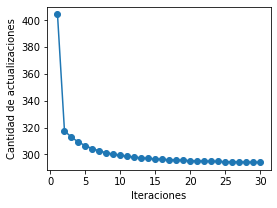

In [15]:
plt.plot(range(1, len(nl.errors_) + 1), nl.errors_, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('Cantidad de actualizaciones')
plt.show()

In [16]:
print(nomCol)

['longitude' 'latitude' 'housing_median_age' 'total_rooms'
 'total_bedrooms' 'population' 'households' 'median_income']


[-0.69792923 -0.59829365  0.02380603  0.30410428  0.43075019 -1.2649792
  0.00147486  0.90232629]


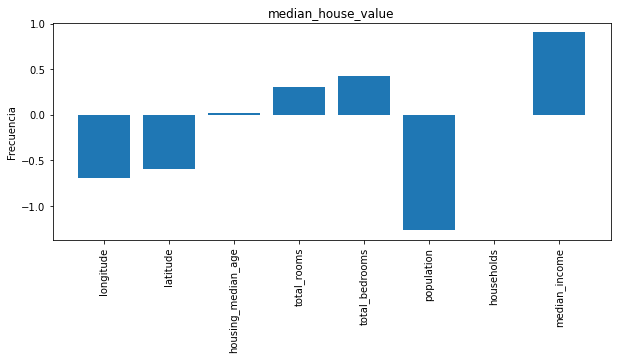

In [17]:
barras = np.mean(W,axis=0)  #nl.w_
print(barras)

plt.figure(figsize=(10, 4))
N = len(barras)
plt.bar(np.arange( N ), barras)  # Gráfico de barras
plt.title(nomBuscado)      # Colocamos el título
plt.ylabel('Frecuencia')
# Colocamos las etiquetas del eje x
plt.xticks(np.arange( N ), nomCol, rotation=90)
plt.show()

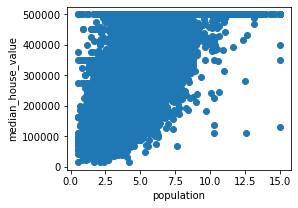

In [18]:
plt.figure()
plt.scatter(df['median_income'],df['median_house_value'])
plt.xlabel('population')
plt.ylabel('median_house_value')
plt.show()